## Task 3: Customer Segmentation / Clustering
#### Perform customer segmentation using clustering techniques. Use both profile information (from Customers.csv) and transaction information (from Transactions.csv).
● You have the flexibility to choose any clustering algorithm and any number of clusters in
between(2 and 10)
● Calculate clustering metrics, including the DB Index(Evaluation will be done on this).
● Visualise your clusters using relevant plots.
Deliverables:
● A report on your clustering results, including:
○ The number of clusters formed.
○ DB Index value.
○ Other relevant clustering metrics.
● A Jupyter Notebook/Python script containing your clustering code.
## Evaluation Criteria:
● Clustering logic and metrics.
● Visual representation of clusters.

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

In [2]:
customers = pd.read_csv("Customers.csv")
transactions = pd.read_csv("Transactions.csv")

In [3]:
combined = transactions.merge(customers, on="CustomerID", how="left")

In [4]:
combined

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price,CustomerName,Region,SignupDate
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68,Andrea Jenkins,Europe,2022-12-03
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68,Brittany Harvey,Asia,2024-09-04
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68,Kathryn Stevens,Europe,2024-04-04
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68,Travis Campbell,South America,2024-04-11
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68,Timothy Perez,Europe,2022-03-15
...,...,...,...,...,...,...,...,...,...,...
995,T00496,C0118,P037,2024-10-24 08:30:27,1,459.86,459.86,Jacob Holt,South America,2022-01-22
996,T00759,C0059,P037,2024-06-04 02:15:24,3,1379.58,459.86,Mrs. Kimberly Wright,North America,2024-04-07
997,T00922,C0018,P037,2024-04-05 13:05:32,4,1839.44,459.86,Tyler Haynes,North America,2024-09-21
998,T00959,C0115,P037,2024-09-29 10:16:02,2,919.72,459.86,Joshua Hamilton,Asia,2024-11-11


In [6]:
customer_features = combined.groupby("CustomerID").agg({
    "TotalValue": "sum",       # Total spend
    "TransactionID": "count",  # Number of transactions
    "Quantity": "sum",         # Total quantity purchased
    "Region": "first",         # Customer region
}).reset_index()

In [7]:
customer_features

,CustomerID,TotalValue,TransactionID,Quantity,Region
0,C0001,3354.52,5,12,South America
1,C0002,1862.74,4,10,Asia
2,C0003,2725.38,4,14,South America
3,C0004,5354.88,8,23,South America
4,C0005,2034.24,3,7,Asia
...,...,...,...,...,...
194,C0196,4982.88,4,12,Europe
195,C0197,1928.65,3,9,Europe
196,C0198,931.83,2,3,Europe
197,C0199,1979.28,4,9,Europe


In [8]:
encoder = OneHotEncoder()
encoded_region = encoder.fit_transform(customer_features[["Region"]]).toarray()

In [9]:
scaler = MinMaxScaler()
normalized_values = scaler.fit_transform(customer_features[["TotalValue", "TransactionID", "Quantity"]])
feature_matrix = np.hstack([normalized_values, encoded_region])

### Clustering code

In [10]:
db_scores = []
clusters_range = range(2, 11)
for k in clusters_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    clusters = kmeans.fit_predict(feature_matrix)
    db_index = davies_bouldin_score(feature_matrix, clusters)
    db_scores.append(db_index)

optimal_k = clusters_range[np.argmin(db_scores)]
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(feature_matrix)
customer_features["Cluster"] = clusters

#  Davies-Bouldin Index for the optimal K
final_db_index = davies_bouldin_score(feature_matrix, clusters)

# Dimensionality Reduction
pca = PCA(n_components=2)
reduced_features = pca.fit_transform(feature_matrix)
customer_features["PCA1"] = reduced_features[:, 0]
customer_features["PCA2"] = reduced_features[:, 1]

In [11]:
kmeans

KMeans(n_clusters=4, random_state=42)

In [12]:
optimal_k

4

In [13]:
final_db_index

0.43125421154304205

In [14]:
pca

PCA(n_components=2)

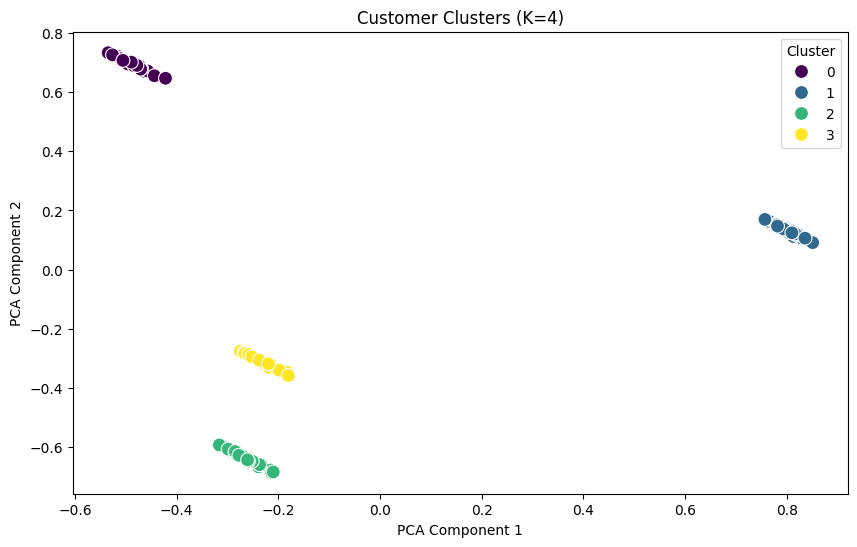

In [15]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=customer_features, x="PCA1", y="PCA2", hue="Cluster", palette="viridis", s=100)
plt.title(f"Customer Clusters (K={optimal_k})")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(title="Cluster")
plt.show()

In [16]:
print(f"Optimal Number of Clusters: {optimal_k}")
print(f"Davies-Bouldin Index: {final_db_index}")

Optimal Number of Clusters: 4
Davies-Bouldin Index: 0.43125421154304205


In [17]:
customer_features[["CustomerID", "Cluster"]].to_csv("Customer_Clusters.csv", index=False)